<a href="https://colab.research.google.com/github/akashh005/Yulu_BC_Hypothesis_Testing/blob/main/YULU_BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

How you can help here?

**The company wants to know:**

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
How well those variables describe the electric cycle demands

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading the data
df = pd.read_csv('/content/drive/MyDrive/yulu.csv')
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [5]:
# checking the number of rows and columns.
print(" number of rows :", df.shape[0])
print(" number of columns :", df.shape[1])

 number of rows : 10886
 number of columns : 12


In [6]:
# checking for null values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

there are no null values present in the data.

In [7]:
# checking the data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
# converting the datetime cloumn datatype from object to datetime
df['datetime'] = pd.to_datetime(df['datetime'])

In [9]:
df['datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10886 entries, 0 to 10885
Series name: datetime
Non-Null Count  Dtype         
--------------  -----         
10886 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 85.2 KB


In [10]:
# checking for any duplicate rows in the data.
print("There are", df.duplicated().sum(), "duplicate rows")

There are 0 duplicate rows


In [11]:
# checking how many unique values are present the columns.
cols = ['season', 'holiday', 'workingday', 'weather']
for col in cols:
  print(df[col].value_counts())
  print("\n")

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64


holiday
0    10575
1      311
Name: count, dtype: int64


workingday
1    7412
0    3474
Name: count, dtype: int64


weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64




**observations**

1.   There are 4 unique seasons and the distribution is almost normal.
         *   1: spring
         *   2: summer
         *   3: fall
         *   4: winter



2.   holiday has two unique values :
         *   1 : holiday
         *   0 : not a holiday
3.   workingday has two unique values :

         *   1 : working day (not a weekend)
         *   0 : not a working day (weekend)
4.   weather has four unique values and  are unequally distributed.
         *  1: Clear, Few clouds, partly cloudy, partly cloudy
         *  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
         *  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
         *  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog







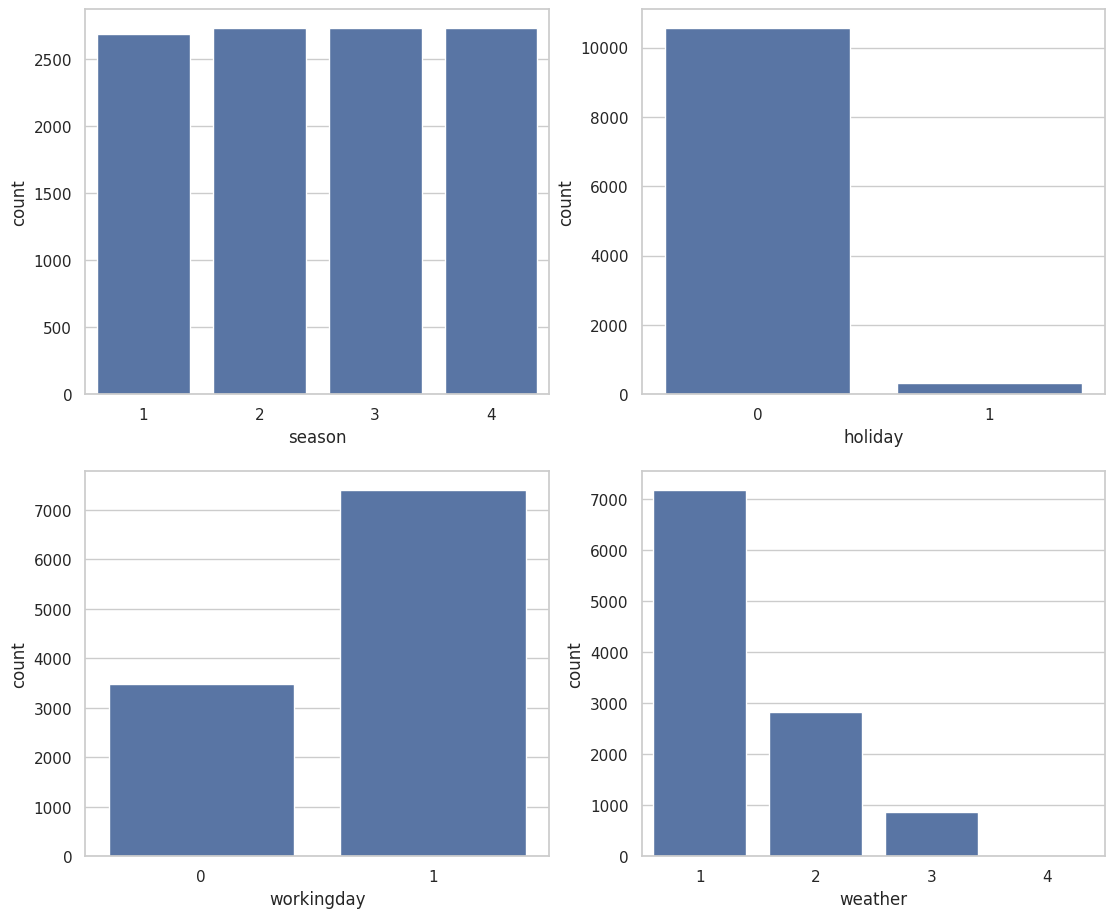

In [12]:
# univariate analysis ( countplot).
col = ['season', 'holiday', 'workingday', 'weather']
sns.set(style='whitegrid')
fig = plt.figure(figsize=(8,11))
fig.subplots_adjust(right=1.4)
for i in col :
  ax = fig.add_subplot(2,2,col.index(i)+1)
  sns.countplot(data=df, x=i)


**observations**


1.   there are almost equal number of seasons present in the dataset.
2.   there are less holidays which is obvious.
3.   working days are more (1 : noe a weekend neither a holiday)
4.   there is significant differences in the weather.



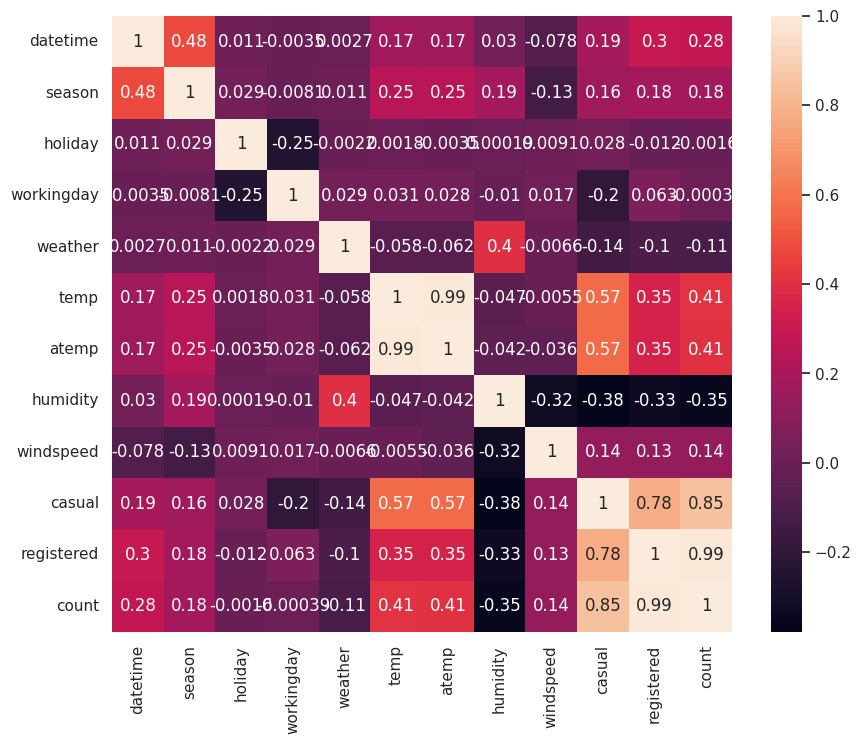

In [13]:
# checking for any corelation between the columns.
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(method='spearman') , annot=True)
plt.show()

**observations :**


1.   temp and atemp are highly correlated because as temp increases, atemp also increases. temp and atemp does not have much difference, if there is it will be very minute.
2.   casual, registere and count are highly correlated as count = casual + registered.




In [14]:
# dropping the highly correlated columns.
df1 = df.drop(columns=['casual', 'registered', 'atemp'])
df1.head(3)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,32


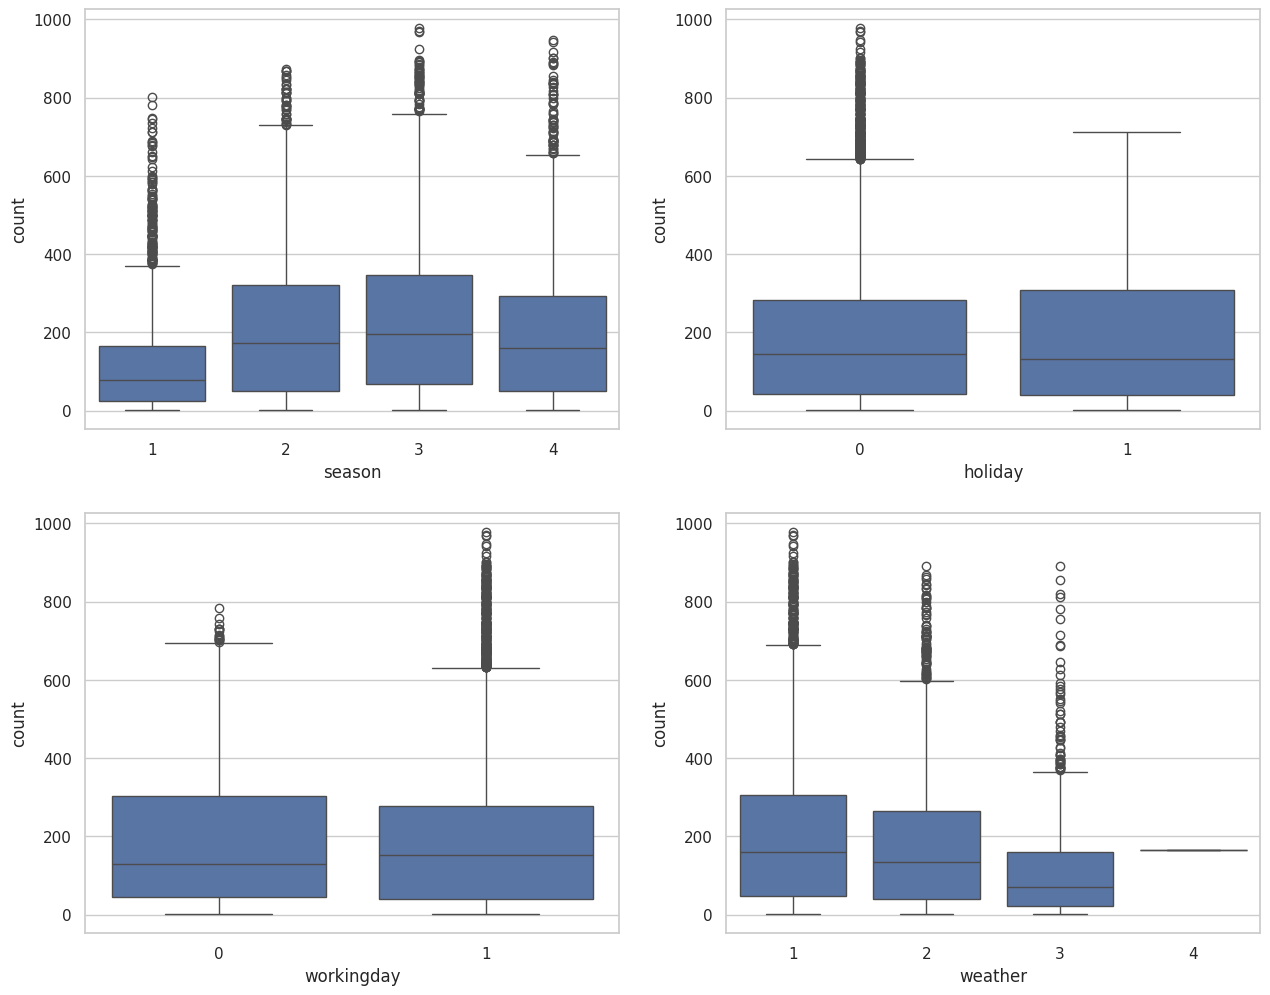

In [15]:
# detecting outliers using IQR method.
col = ['season', 'holiday', 'workingday', 'weather']
sns.set(style='whitegrid')
fig = plt.figure(figsize=(10,12))
fig.subplots_adjust(right=1.3)
for i in col :
  ax = fig.add_subplot(2,2,col.index(i)+1)
  sns.boxplot(data=df1, x=i, y=df1['count'])




**Observations**

*   the data has so many outliers.
*   The outliers are not always harmful for the data. According to this business problem, we can think like what made people to book yulu vehicle on this perticular season or weather. or what made people to book yulu vehicle when there was not a holiday.
*   it can give some usefull insights.



# Handling outliers.

so in this perticular business case, we are not going to remove the outliers. instead we will keep them as it is.

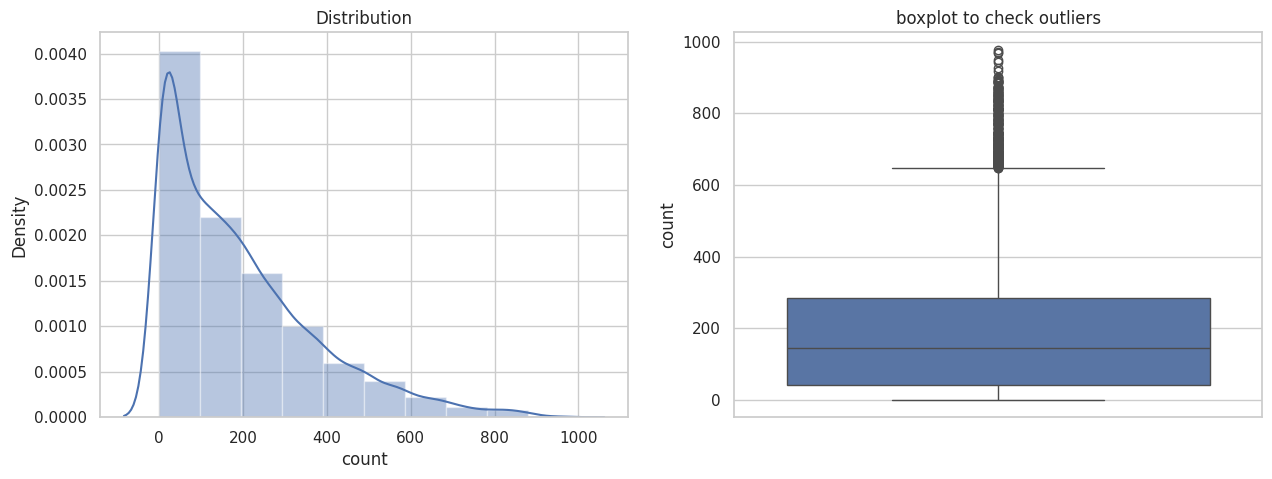

In [16]:
# To perform hypothesis testing, the data should be distributed normally.

# checking the distribution of the Target variable.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df1['count'], bins=10)
plt.title('Distribution')

# checking for outliers.
plt.subplot(1,2,2)
sns.boxplot(df1['count'])
plt.title('boxplot to check outliers')
plt.show()


**Observation**
*   the data is right skewed (does not follow uniform distribution).
*   the data  has outliers.  

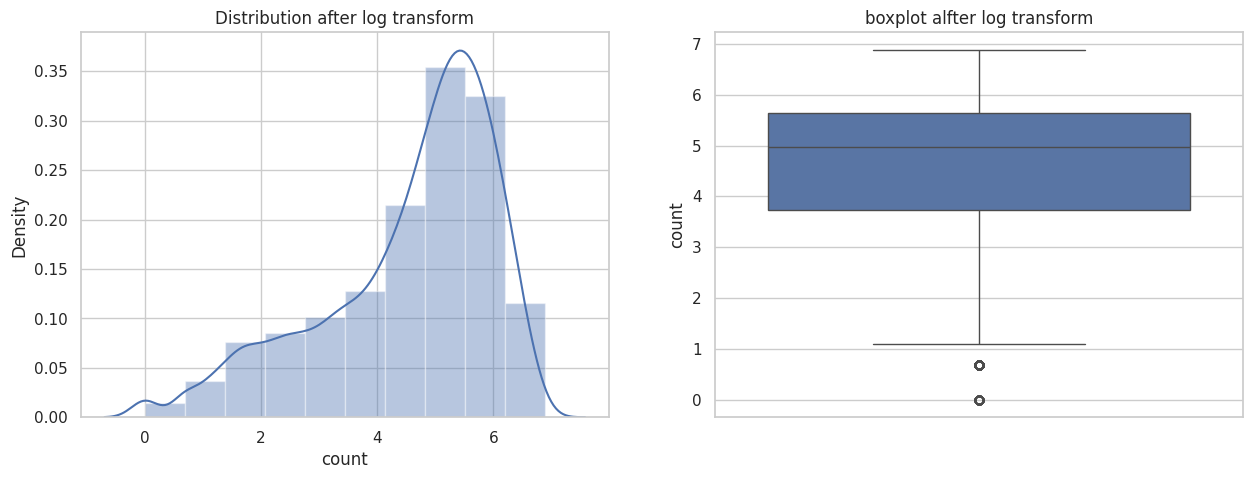

In [17]:
# applying log transformation to the target variable so that the data can be close to normal distribution.
# and so that impact of outliers can be reduced.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(np.log(df1['count']), bins=10)
plt.title('Distribution after log transform')

# checking for outliers.
plt.subplot(1,2,2)
sns.boxplot(np.log(df1['count']))
plt.title('boxplot alfter log transform')
plt.show()

Now the data is close to  normal distribution and also the impact of outliers is reduced.  

In [18]:
# lets check the statistical information of each column.

df1.groupby(df1['workingday'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [19]:
df1.groupby(df1['holiday'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


In [20]:
df1.groupby(df1['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [21]:
df1.groupby(df1['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


# **Hypothesis Testing**

#1. Checking if there is significant difference between the no. of bike rides on Weekdays and Weekends.

In [22]:
# 1. Checking if there is significant difference between the no. of bike rides on Weekdays and Weekends.

# a. loading the data
weekdays = df1[df1['workingday']==1]['count'].sample(3000)
weekends = df1[df1['workingday']==0]['count'].sample(3000)

# b. lets do normality test using shapiro-wilk test.
from scipy.stats import shapiro
wd = shapiro(weekdays)
we = shapiro(weekends)
print("shapiro test for weekdays :", wd)
print("shapiro test for weekends :", we)

# c. lets do variablity test using levene test.
from scipy.stats import levene
vl = levene(weekdays, weekends)
print("levene test :", vl)

shapiro test for weekdays : ShapiroResult(statistic=0.8660875558853149, pvalue=5.605193857299268e-45)
shapiro test for weekends : ShapiroResult(statistic=0.8849581480026245, pvalue=1.2499582301777368e-42)
levene test : LeveneResult(statistic=0.028057386936292776, pvalue=0.8669796243210749)


**Important Observation and Note**

*   As seen above, in both the shapiro tests the p_value is very very less than 0.05. This indicates that the sample doesn't follow a normal distribution.

 **Note:** it is just a sample, not the whole population. so it can be obvious that sample may not follow the normal distribution(N.D). the population may follow thr N.D. so we won't care about it much.
*   In levene test, the p_value > 0.05, so this means that there is not significant variablity in the sample's means  (in the boxplot also same thing can be seen).  



In [23]:
# performing the Hypothesis test using two sample t-test.
# setting up Null and Alternative Hypothesis.
Ho = 'The demand of bikes on weekdays is greater or similar to the demand of bikes on weekend.'

Ha = 'The demand of bikes on weekdays is less than the demand of bikes on weekend.'

**H0 :  The demand of bikes on weekdays is greater or similar to the demand of bikes on weekend.**

**Ha :  The demand of bikes on weekdays is less than the demand of bikes on weekend.**





In [24]:
# selecting the appropriate test.

As the population standard deviation is not avilable so we will use t-test.

There is a categorical and numerical data and also the variables are independent so we will prefer ind_two_sample_t-test.

In [25]:
print('The sample standard deviation of the bike rides on weekday is:', round(weekdays.std(), 2))
print('The sample standard deviation of the bike rides on weekend is:', round(weekends.std(), 2))

The sample standard deviation of the bike rides on weekday is: 184.52
The sample standard deviation of the bike rides on weekend is: 173.34


As the sample standard deviations are different, the population standard deviations can be assumed to be different.

In [26]:
# deciding the significance level
alpha = 0.05

As given in the problem statement, we select α = 0.05.

In [27]:
# performing the test and calculating the p_value and t_statistic values.
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(weekdays, weekends, alternative='less')
print('The p-value is : ', p_value)

# accepting or rejceting the null hypothesis based on p_value
if p_value < alpha:
  print("Reject the null hypothesis")
  print('That means', Ha)
else:
  print("Fail to reject the null hypothesis")
  print('That means', Ho)

The p-value is :  0.7685341869021725
Fail to reject the null hypothesis
That means The demand of bikes on weekdays is greater or similar to the demand of bikes on weekend.


**Observation:** Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides during weekdays is greater than or equal to those on weekends.

# 2. Checking if the demand of bicycles on rent is the same for different Weather conditions.

In [28]:
# loading the data for weather conditions.
df1 = df1[~(df1['weather']==4)]

In [29]:
df1.groupby(df1['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0


In [30]:
w1 = df1[df1['weather']==1]['count'].sample(800)
w2 = df1[df1['weather']==2]['count'].sample(800)
w3 = df1[df1['weather']==3]['count'].sample(800)

we dropped the weather condition 4 as it had only one entry.

In [31]:
# Defining the Null and alternate hypothesis.
Ho = 'The average demand of bicycles on rent is same for different Weather conditions.'
Ha = 'The average demand of bicycles on rent is different for different Weather conditions.'

**Ho : The average demand of bicycles on rent is same for different Weather conditions.**

**Ha:  The demand of bicycles on rent is different for different Weather conditions.**

In [32]:
# selecting the appropriate test.

As there are different categories for weather conditions(more than 2) along with a Numerical Variable, so we will be doing **ANOVA Test**.

In [33]:
# checking the assumptions for anova test.

The ANOVA test has three important assumptions that must be satisfied.

 * The samples are independent.
 * Each sample is from a normally distributed population.
 * The population variance of the groups are all equal.

In [34]:
# lets check the normality of the sample.

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

In [35]:
Ho_ = "follows normal distribution."
Ha_ = "does not follow normal distribution."
alpha = 0.05
st1, p_value1 = shapiro(w1)
print("p_value for w1 = ",p_value1)
if p_value1 < alpha:
  print('That means', Ha_)
else:
  print('That means', Ho_)
st2, p_value2 = shapiro(w2)
print("\n")
print("p_value for w2 = ",p_value2)
if p_value1 < alpha:
  print('That means', Ha_)
else:
  print('That means', Ho_)
  print("\n")
st3, p_value3 = shapiro(w3)
print("\n")
print("p_value for w3 = ",p_value3)
if p_value1 < alpha:
  print('That means', Ha_)
else:
  print('That means', Ho_)
  print("\n")

p_value for w1 =  3.309677413669535e-22
That means does not follow normal distribution.


p_value for w2 =  7.593272348285081e-25
That means does not follow normal distribution.


p_value for w3 =  4.7029997895007777e-32
That means does not follow normal distribution.


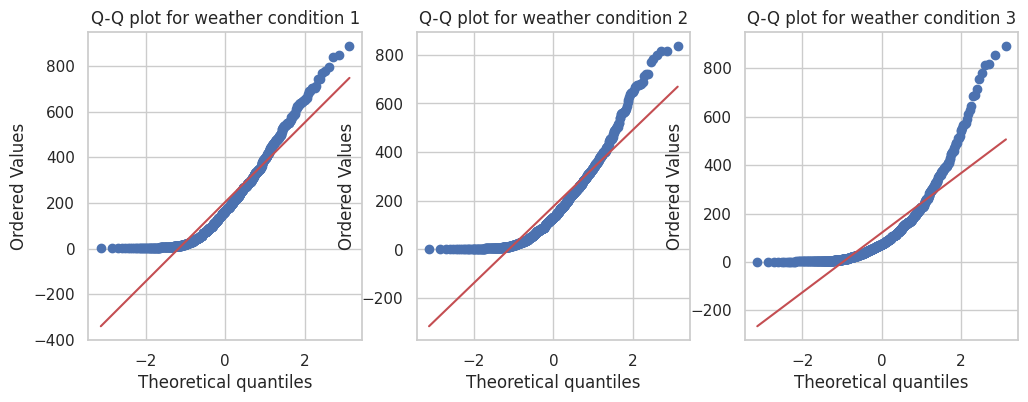

In [36]:
# using Q-Q plot.

import scipy.stats as stats
data = [w1, w2, w3]
plt.figure(figsize=(12,4))
for i in range(len(data)):
  plt.subplot(1,3,i+1)
  stats.probplot(data[i], dist="norm", plot=plt)
  plt.title(f'Q-Q plot for weather condition {i+1}')



**observation on the normality test.**

*  None of them follows normal distribution.


*  Both the test gave this information.



In [37]:
# checking the variablity


To check variablity, we will use levene test.

In [38]:
_Ho = "w1, w2, w3 has same variance."
_Ha = "w1, w2, w3 has different variance."
alpha = 0.05
stat, p_val = levene(w1, w2, w3)
print('The p-value is : ', p_val)
print("\n")
if p_val < alpha:
  print(_Ha, "Rejected null hypothesis")
else:
  print(_Ho, "Failed to reject the null hypothesis")


The p-value is :  5.316061430429477e-18


w1, w2, w3 has different variance. Rejected null hypothesis


The variance for w1, w2, w3 are different.

**The assumptions for the Anova test has faild.**


so in this scenario we can either do Kruskal-wallis test or we can go with ANOVA only.

### Central Limit Theorem -

* According to this theorem, the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution.

* In other words, if we find the mean of a large number of independent random variables, the mean
will follow a normal distribution, irrespective of the distribution of the original variables.

* In practice, sample sizes equal to or greater than 30-40 are often considered sufficient for the CLT to hold.

Hence, the sample size being large enough, we don't need to worry about the non-normality of distribution of the data set in hand before applying the tests.

Eventually, as the sample size gets larger, the distribution of sample means will fall into a normal or near normal shape.



In [39]:
# applying kruskal wallis test.
stt, p_v = stats.kruskal(w1, w2, w3)
print('The p-value is : ', p_v)
print("\n")
if p_v < alpha:
  print("Reject null hypothesis")
  print(Ha)
else:
  print("Failed to reject the null hypothesis")
  print(Ho)

The p-value is :  4.522923959725055e-24


Reject null hypothesis
The average demand of bicycles on rent is different for different Weather conditions.


In [40]:
# applying f_oneway (ANOVA) test.
_stat_ , _p_val = stats.f_oneway(w1, w2, w3)
print('The p-value is : ', _p_val)
print("\n")
if _p_val < alpha:
  print("Reject null hypothesis")
  print(Ha)
else:
  print("Failed to reject the null hypothesis")
  print(Ho)

The p-value is :  1.1502091011633719e-23


Reject null hypothesis
The average demand of bicycles on rent is different for different Weather conditions.


**Observation:**

 Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides in different weather conditions are not equal.

# 3. Is there any significant difference between the no. of bike rides on regular days and holidays

In [43]:
# defining Null and Alternate hypothesis.
Ho_null = " Demand of bike rides on regular days is greater or similar to the rides on holidays. "
Ha_alt = " Demand of bike rides on regular days is less than the rides on holidays. "

**Ho : Demand of bike rides on regular days is greater or similar to the rides on holidays.**


**Ha : Demand of bike rides on regular days is less than the rides on holidays.**

In [44]:
# loading the data for the hypothesis test.
hd = df1[df1['holiday']==1]['count'].sample(300)
rd = df1[df1['holiday']==0]['count'].sample(300)

In [45]:
df1.groupby(df1['holiday'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10574.0,191.744278,181.521514,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


The std. deviation of the samples are different (181 and 161), so it can be assumed that the population std. deviation will also be different.

In [46]:
# selecting appropriate test.

This is also a one-tailed test concerning two population means from two independent populations.

As the population standard deviations are unknown, also here we have categorical and a numerical variable the two sample independent t-test will be the appropriate test for this problem.

In [47]:
# defining the significance level
aplha = 0.05

In [52]:
# applying the t_test_ind
st, p_valu = stats.ttest_ind(hd, rd, alternative='less')
print(" The p_value is", p_valu)
if p_valu < alpha:
  print(" As p_valu < aplha(0.05), so we Reject null hypothesis")
  print("\n")
  print(Ha_alt)
else:
  print(" As p_valu > alpha(0.05), so we Failed to reject null hypothesis")
  print("\n")
  print(Ho_null)


 The p_value is 0.6334430955323991
 As p_valu > alpha(0.05), so we Failed to reject null hypothesis


 Demand of bike rides on regular days is greater or similar to the rides on holidays. 


**Observation:**

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides during regular days is greater than or equal to those on holidays.

# 4. Is the demand of bicycles on rent same for different seasons.

In [54]:
# Defining the null and alternative hypothesis.
NH = 'The average demand of bicycles on rent is same for different seasons.'
AH = 'The average demand of bicycles on rent is different for different seasons.'

**Ho : The average demand of bicycles on rent is same for different seasons.**


**Ha : The average demand of bicycles on rent is different for different seasons.**

In [61]:
df1.groupby(df1['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2685.0,116.325512,125.293931,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [56]:
# defining the significance level.
alpha = 0.05

In [ ]:
# selecting the appropriate test.


we have more than two categories along with numerical variable. so ANOVA(f_oneway) test will be good to go.

In [57]:
# loading the data
s1 = df1[df1['season']==1]['count'].sample(2500)
s2 = df1[df1['season']==2]['count'].sample(2500)
s3 = df1[df1['season']==3]['count'].sample(2500)
s4 = df1[df1['season']==4]['count'].sample(2500)

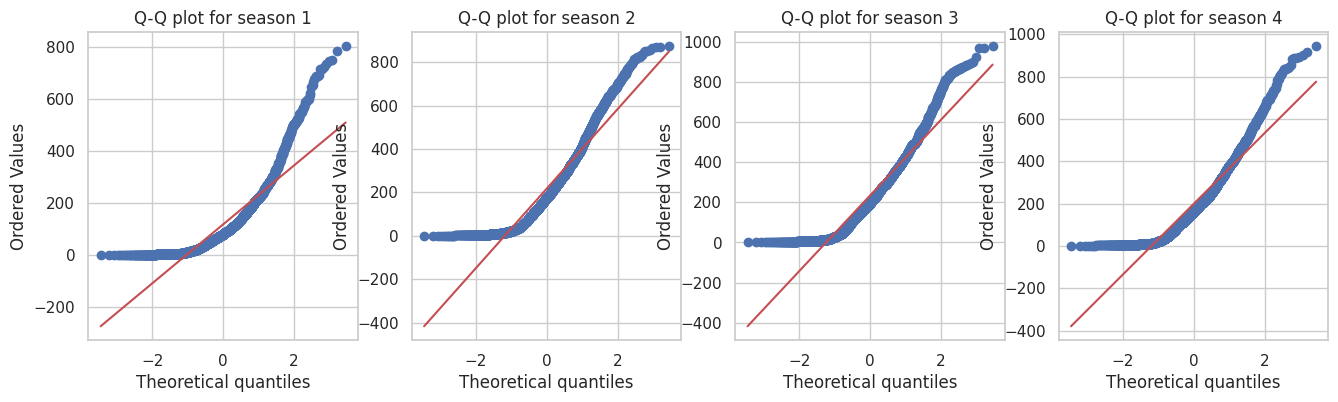

In [60]:
# checking the assumptions for anova test.
# 1. normality test using Q-Q plot
seasn = [s1, s2, s3, s4]
plt.figure(figsize=(16,4))
for i in range(len(seasn)):
  plt.subplot(1,4,i+1)
  stats.probplot(seasn[i], dist="norm", plot=plt)
  plt.title(f'Q-Q plot for season {i+1}')


**Observation**

the seasons are not normally distributed. do this assumption is failed.

In [63]:
# homoginity of variance using levene test.
# Ho = "s1, s2, s3, s4 has same variance."
# Ha = "s1, s2, s3, s4 has different variance."
tstat, p_val = stats.levene(s1, s2, s3, s4)
print('The p-value is : ', p_val)

if p_val < alpha:
  print("Reject null hypothesis")
  print("This means that the variances are different.")
else:
  print("Failed to reject null hypothesis")
  print("This means that the variances are same.")
  print("\n")


The p-value is :  3.6677901546765887e-109
Reject null hypothesis
This means that the variances are different.


This assumption of ANOVA also failed.

In [64]:
# doing kruskal wallis test. Alternative for ANOVA.
stt, p_vlu = stats.kruskal(s1, s2, s3, s4)
print('The p-value is : ', p_vlu)
print("\n")
if p_vlu < alpha:
  print("Reject null hypothesis")
  print(AH)
else:
  print("Failed to reject the null hypothesis")
  print(NH)

The p-value is :  4.0070728768337505e-138


Reject null hypothesis
The average demand of bicycles on rent is different for different seasons.


In [65]:
# lests do f_oneway test and compare it with the above value.
_stat , _p_val_ = stats.f_oneway(s1, s2, s3, s4)
print('The p-value is : ', _p_val_)
print("\n")
if _p_val_ < alpha:
  print("Reject null hypothesis")
  print(AH)
else:
  print("Failed to reject the null hypothesis")
  print(NH)

The p-value is :  1.835311595262628e-136


Reject null hypothesis
The average demand of bicycles on rent is different for different seasons.


**Observation:**

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides in different seasons are not equal.

# 5. Are the weather conditions significantly different during different seasons?

In [66]:
# Define the null and alternate hypothesis
nl_hyp = 'Weather conditions are independent of the season.'
al_hyp = 'Weather condition depends on the ongoing season.'

**Ho : 'Weather conditions are independent of the season.'**


**Ha : 'Weather condition depends on the ongoing season.'**

In [ ]:
# Select an appropriate test

Although the data values in 'season' and 'weather' columns are numerical, as per our intuition, they still represent different catgories. Hence, we will encode them accordingly before moving onto the tests.

In [68]:
dict1 = {1: 'Sunny',
         2: 'Cloudy',
         3: 'Rainy'}
df1['weather_enc'] = df1['weather'].map(dict1)

In [69]:
dict2 = {1: 'Summer',
         2: 'Monsoon',
         3: 'Winter',
         4: 'Autumn'}
df1['season_enc'] = df1['season'].map(dict2)

Here we will be comparing two different categorical variables, 'season' and 'weather'. So will perform a **Chi-square test**.

In [70]:
contigency= pd.crosstab(df1.season_enc, df1.weather_enc)
contigency


weather_enc,Cloudy,Rainy,Sunny
season_enc,,,
Autumn,807,225,1702
Monsoon,708,224,1801
Summer,715,211,1759
Winter,604,199,1930


<Axes: xlabel='season_enc'>

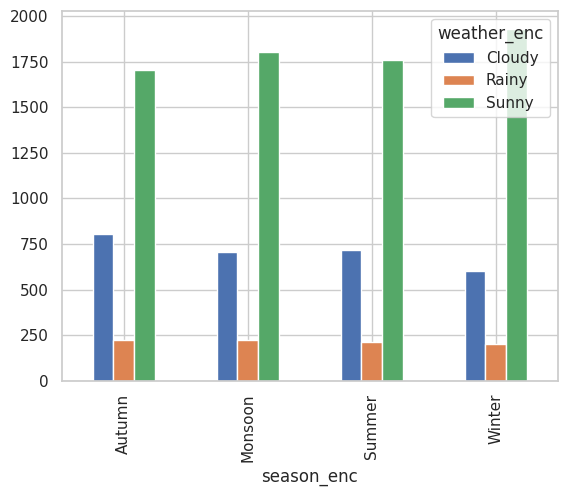

In [71]:
contigency.plot(kind='bar')

In [72]:
# defining the significance level.
alpha = 0.05

In [77]:
# applying chi-squared test
from scipy.stats import chi2_contingency
chi2, p_vl, dof, exp_freq = chi2_contingency(contigency)
print('The p-value is : ', p_vl)
print('dof =', dof)
print('expected frequency =', exp_freq)
print("\n")
if p_vl < alpha:
  print("Reject null hypothesis")
  print(al_hyp)
else:
  print("Failed to reject the null hypothesis")
  print(nl_hyp)

The p-value is :  2.8260014509929343e-08
dof = 6
expected frequency = [[ 711.81956821  215.75617823 1806.42425356]
 [ 711.55920992  215.67726229 1805.76352779]
 [ 699.06201194  211.8892972  1774.04869086]
 [ 711.55920992  215.67726229 1805.76352779]]


Reject null hypothesis
Weather condition depends on the ongoing season.


**Observation:**

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the weather conditions are dependent on the ongoing season.

# **Insights and Recommendations**

#### **EDA based insights -**

1. Total 10,886 rows were present in the data set.
2. Neither missing values, nor duplicate rows were found.
3. 'temp' and 'atemp' columns were found to be highly correlated. </br> Dropping one of them (atemp) to avoid multicollinearity.
4. 'count', 'casual' and 'registered' columns were highly correlated. </br> Dropping casual & registered columns to avoid multicollinearity.
5. Outlier values were found in the 'count' column.

#### **Insights from hypothesis testing -**
1. The no. of bikes rented on weekdays is comparatively higher than on weekends.
2. The no. of bikes rented on regular days is comparatively higher than on holidays.
2. The demand of bicycles on rent differs under different weather conditions.
3. The demand of bicycles on rent is different during different seasons.
4. The weather conditions are surely dependent upon the ongoing season.

#### **Miscellaneous observations -**
The distribution of 'count' column wasn't actually normal or near normal. </br> Infact the column's distribution is found to be a bit skewed towards right.

#### **Generic recommendations -**

* The demand of bikes on rent are usually higher during Weekdays.
* The demand of bikes on rent are usually higher during Regular days.
* The chances of person renting a bike are usually higher during Season 3.
* The chances of person renting a bike are usually higher during Weather condition 1.

We recommend the company to maintain the bike stocks accordingly.